# Visualization

#### Valid PPG signal segments with reference BPs
Sequence of normal PPG segments surrounding normal blood pressure measurements.
Based on the assumption of one PPG measurment representing 0.01 seconds of measurement.

In [214]:
# Create an example df for visualization
patient = '22043146'
files, files_names = FileName_and_dfPPG_and_FileNum(patient)
df_BP, type_BP = import_data_BP(patient)
df_list, example_df, total_time_file, all_parts_num, rows_parts_num, valid_bp_parts_num = patient_all_data(patient, files, files_names, df_BP, type_BP, 5, 1, patients_meta_data)

Patient number: 22043146, has 2 files of PPG.
The 1 file of this patient includes 0 valid segments of 7.0 seconds.
The 2 file of this patient includes 6 valid segments of 7.0 seconds.


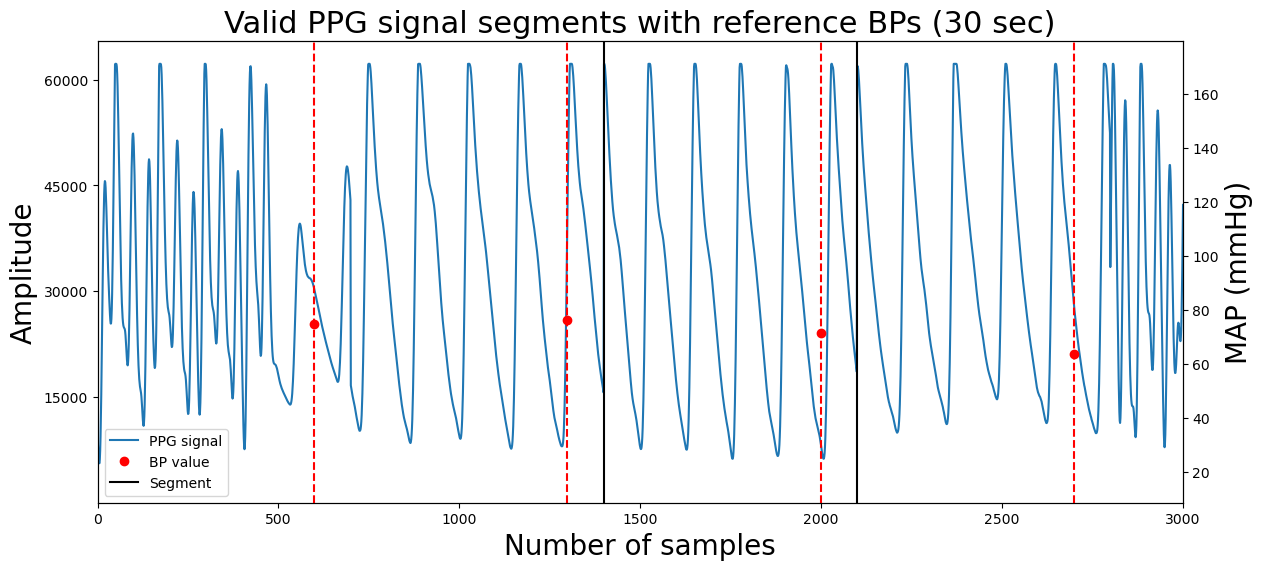

In [223]:
# Create the figure and the first subplot.
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot valid PPG signal.
ppg_line, = ax1.plot(full_df['PLETH'], label='PPG')
i = 0
ax1.set_xlim([i*1000, (i+3)*1000])
ax1.set_title('Valid PPG signal segments with reference BPs (30 sec)', size=22)
ax1.set_xlabel('Number of samples', size=20)
ax1.set_ylabel('Amplitude (volts)', size=20)

# Set y-axis limits explicitly.
ax1.set_ylim([full_df['PLETH'].min(), full_df['PLETH'].max()])

# Add vertical line at the index where BP value exists.
ax2 = ax1.twinx()
ax2.set_ylabel('MAP (mmHg)', size=20)
bp_indices = full_df.index[full_df['MAP'].notna()]
for bp_index in bp_indices:
    bp_value = full_df.loc[bp_index, 'MAP']
    ax2.axvline(x=bp_index, color='r', linestyle='--')
    ax2.plot(bp_index, bp_value, 'ro')

# Plot the black lines of a segment.
plt.axvline(x=1400, color='black', linestyle='-')
ax2.axvline(x=2100, color='black', linestyle='-')

# Set major tick locations for the y-axis.
ax1.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

# Create legend manually.
legend_handles = [ppg_line, ax2.lines[1], ax2.lines[-1]]
legend_labels = ['PPG signal', 'BP value', 'Segment']
ax2.legend(handles=legend_handles, labels=legend_labels, loc='lower left')

plt.show()

#### Valid segment & reference BP
7 seconds of PPG measurement with the full cycles cut off

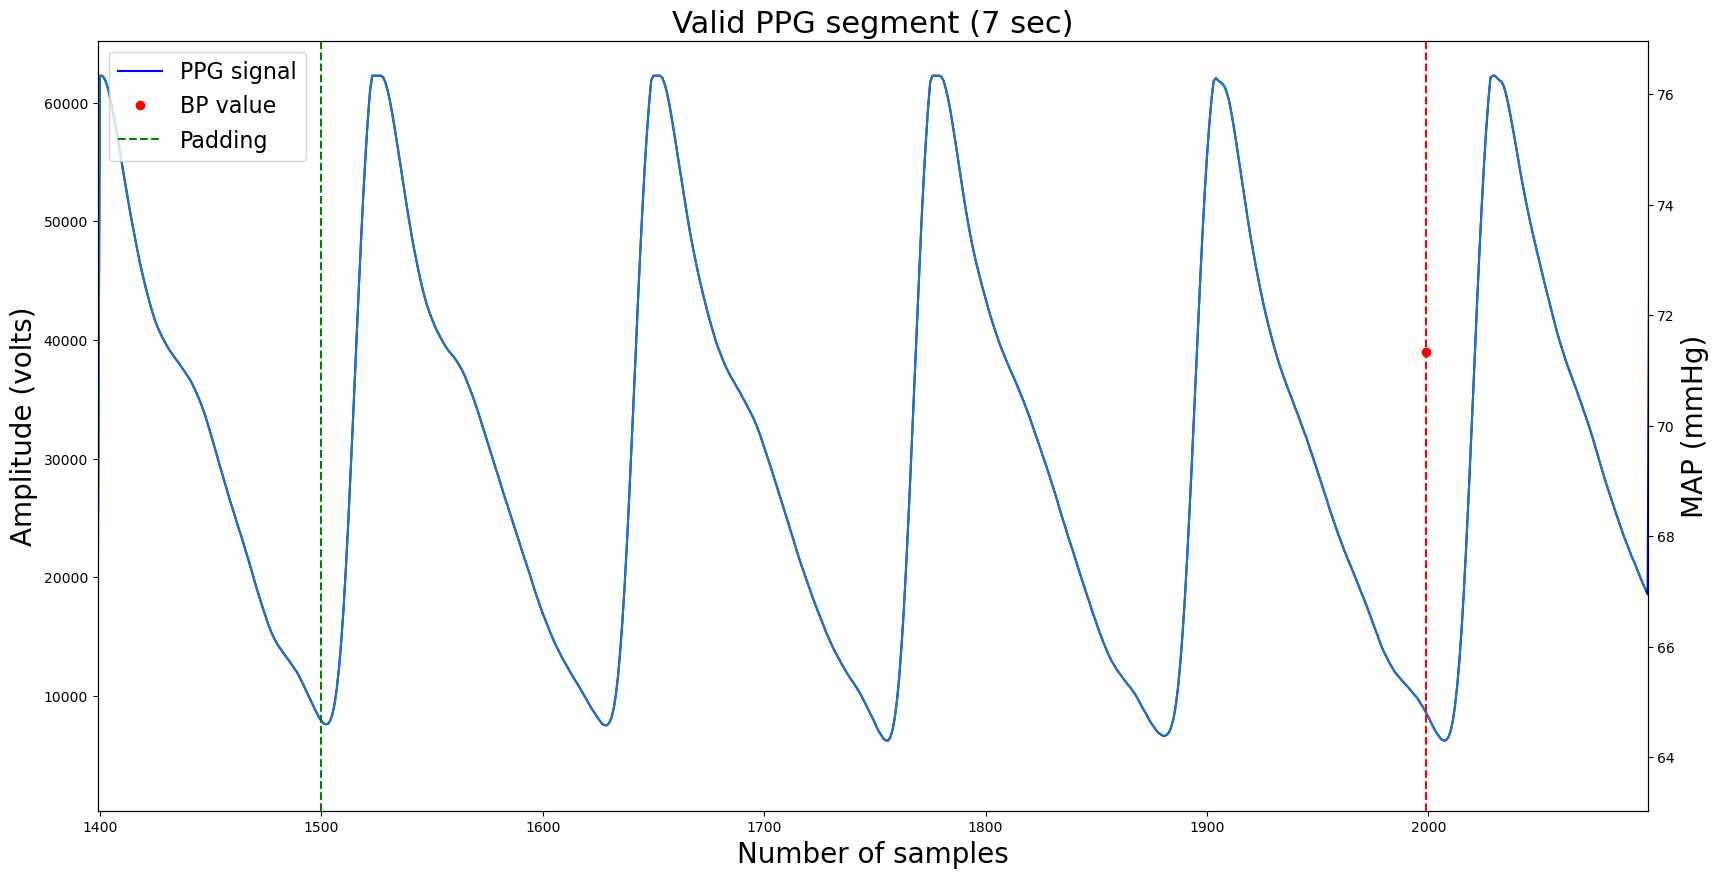

In [227]:
# Create the figure and the first subplot
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot the PPG wave
ppg_line, = ax1.plot(example_df['PLETH'], label='PPG', color='b')
ax1.set_xlim([i*1000, (i+6)*1000])
ax1.set_title('Valid PPG segment (7 sec)', size=22)
ax1.set_xlabel('Number of samples', size=20)
ax1.set_ylabel('Amplitude (volts)', size=20)

# Add vertical lines at the indices where BP values exist
ax2 = ax1.twinx()
ax2.set_ylabel('MAP (mmHg)', size=20)
bp_indices = example_df.index[example_df['MAP'].notna()]
for bp_index in bp_indices:
    bp_value = example_df.loc[bp_index, 'MAP']
    ax2.axvline(x=bp_index, color='r', linestyle='--')
    ax2.plot(bp_index, bp_value, 'ro')

# Get the starting and ending indices for the 7-second range
start_index = bp_indices[2] - 600
end_index = bp_indices[2] + 100

# Plot the PPG values within the 7-second range
wave_7_seconds = example_df['PLETH'][start_index:end_index]
ax1.set_xlim(start_index, end_index)
ax1.plot(wave_7_seconds)

# Add vertical lines to mark the padding
ax2.axvline(x=1500, color='green', linestyle='--')

# Create legend manually
legend_handles = [ppg_line, ax2.lines[1], ax2.lines[-1]]
legend_labels = ['PPG signal', 'BP value', 'Padding']
ax2.legend(handles=legend_handles, labels=legend_labels, loc='upper left', fontsize='16')

plt.show()

#### All pre-processing by steps 
Visual presentation of all stages of early processing from a specific patient segment, using a book and a poster.

C:\Users\shaha\AppData\Local\Temp\ipykernel_5396\535134817.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PLETH_filtered'] = part_filtered
C:\Users\shaha\AppData\Local\Temp\ipykernel_5396\535134817.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PLETH_trend_removel'] = part_detrend


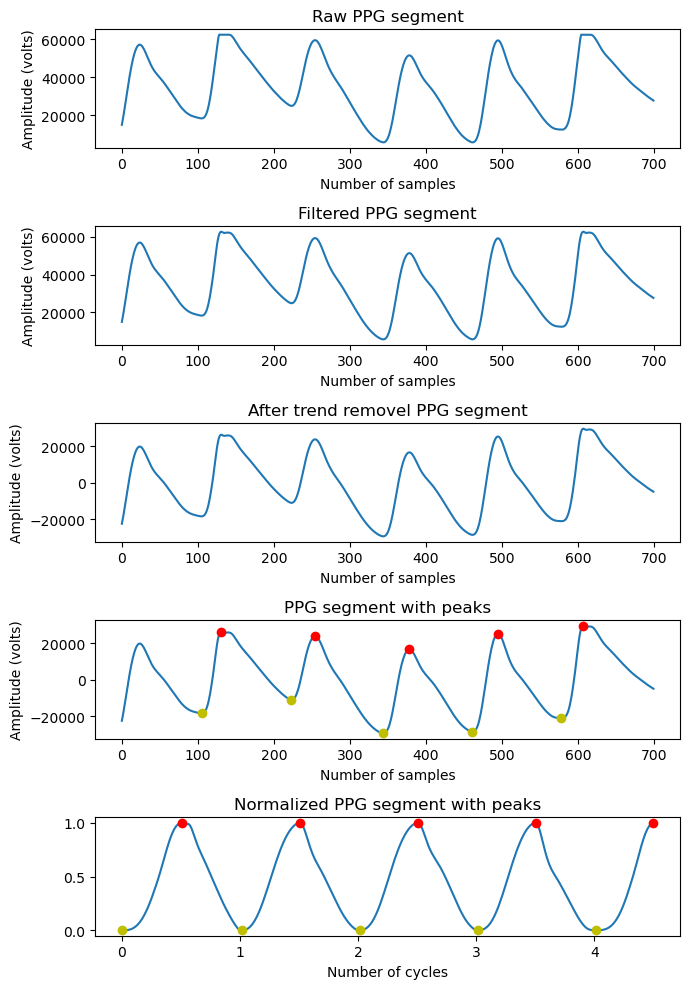

In [228]:
i = 18
data = train_df.iloc[i * 700: (i + 1) * 700]
data.reset_index(drop=True, inplace=True)

plt.figure(figsize=(7, 10))

plt.subplot(511)
raw_ppg = data['PLETH'].values
plt.title(f'Raw PPG segment')
plt.plot(raw_ppg)
plt.xlabel('Number of samples')
plt.ylabel('Amplitude (volts)')

plt.subplot(512)
part_filtered = savgol_filter(raw_ppg, window_length=19, polyorder=4)
data['PLETH_filtered'] = part_filtered
filtered_ppg = data['PLETH_filtered'].values

plt.title(f'Filtered PPG segment')
plt.plot(filtered_ppg)
plt.xlabel('Number of samples')
plt.ylabel('Amplitude (volts)')

plt.subplot(513)
part_detrend = signal.detrend(data['PLETH_filtered'])
data['PLETH_trend_removel'] = part_detrend
trend_removel_ppg = data['PLETH_trend_removel'].values

plt.title(f'After trend removel PPG segment')
plt.plot(trend_removel_ppg)
plt.xlabel('Number of samples')
plt.ylabel('Amplitude (volts)')


plt.subplot(514)
max_peaks, min_peaks = get_peaks(trend_removel_ppg)
plt.title(f'PPG segment with peaks')
plt.plot(trend_removel_ppg)
plt.plot(max_peaks, trend_removel_ppg[max_peaks], 'or')
plt.plot(min_peaks, trend_removel_ppg[min_peaks], 'oy')
plt.xlabel('Number of samples')
plt.ylabel('Amplitude (volts)')

amp_cv_score, time_cv_score, booli = Conditions_PPG(trend_removel_ppg, max_peaks, min_peaks)
if booli:
    norm_data, norm_time, all_peaks, max_peaks, min_peaks = normalize_data(trend_removel_ppg, max_peaks, min_peaks)
    norm_time, norm_data, norm_min_peaks, norm_max_peaks = cutting_into_whole_cycles(norm_data, norm_time, max_peaks, min_peaks)
    plt.subplot(515)
    plt.title(f'Normalized PPG segment with peaks')
    plt.plot(norm_time, norm_data)
    plt.plot(norm_time[norm_max_peaks], norm_data[norm_max_peaks], 'or')
    plt.plot(norm_time[norm_min_peaks], norm_data[norm_min_peaks], 'oy')
    plt.xlabel('Number of cycles')
#     plt.ylabel('Amplitude (volts)')
    
    
plt.tight_layout()
plt.show()

# Drafts

Text(0, 0.5, 'Amplitude (volts)')

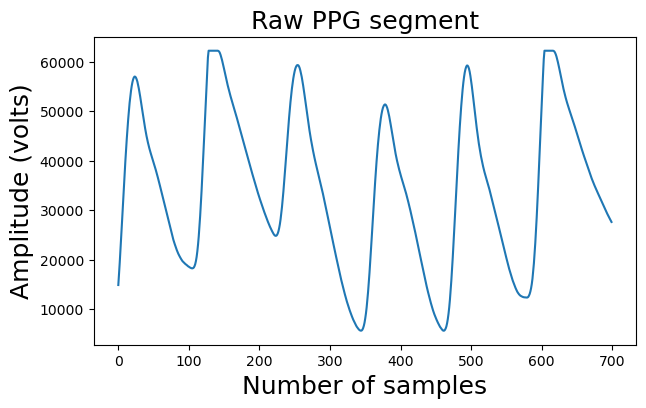

In [207]:
plt.figure(figsize=(7,4))
plt.title(f'Raw PPG segment', size=18)
plt.plot(raw_ppg)
plt.xlabel('Number of samples', size=18)
plt.ylabel('Amplitude (volts)', size=18)

Text(0, 0.5, 'Amplitude (volts)')

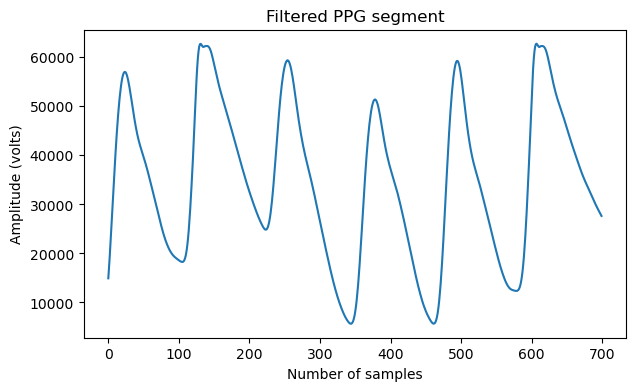

In [178]:
plt.figure(figsize=(7,4))
plt.title(f'Filtered PPG segment')
plt.plot(filtered_ppg)
plt.xlabel('Number of samples')
plt.ylabel('Amplitude (volts)')

Text(0, 0.5, 'Amplitude (volts)')

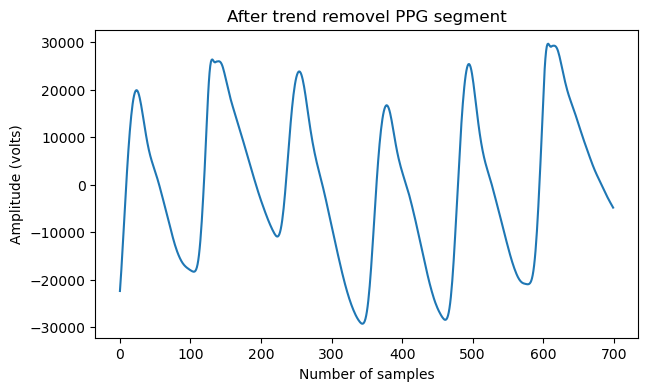

In [179]:
plt.figure(figsize=(7,4))
plt.title(f'After trend removel PPG segment')
plt.plot(trend_removel_ppg)
plt.xlabel('Number of samples')
plt.ylabel('Amplitude (volts)')

Text(0, 0.5, 'Amplitude (volts)')

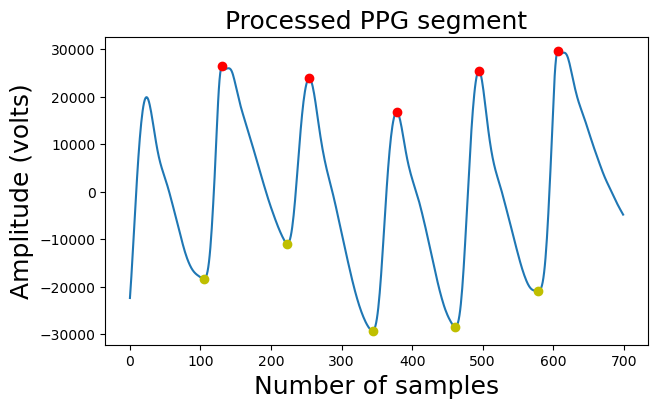

In [196]:
plt.figure(figsize=(7, 4))
max_peaks, min_peaks = get_peaks(trend_removel_ppg)
plt.title(f'Processed PPG segment', size=18)
plt.plot(trend_removel_ppg)
plt.plot(max_peaks, trend_removel_ppg[max_peaks], 'or')
plt.plot(min_peaks, trend_removel_ppg[min_peaks], 'oy')
plt.xlabel('Number of samples', size=18)
plt.ylabel('Amplitude (volts)', size=18)

(0.0, 4.017241379310345)

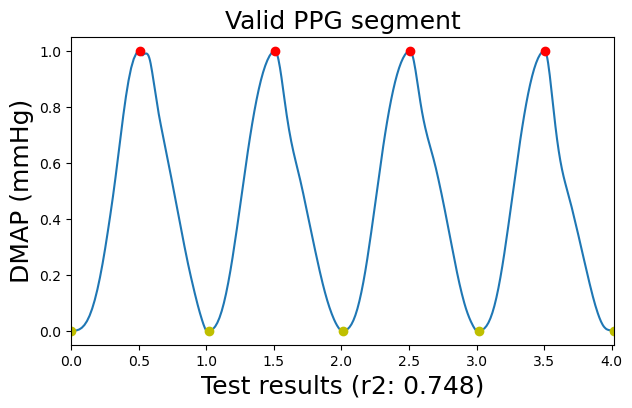

In [206]:
plt.figure(figsize=(7, 4))
plt.title(f'Valid PPG segment', size=18)
plt.plot(norm_time, norm_data)
plt.plot(norm_time[norm_max_peaks], norm_data[norm_max_peaks], 'or')
plt.plot(norm_time[norm_min_peaks], norm_data[norm_min_peaks], 'oy')
plt.xlabel('Test results (r2: 0.748)', size=18)
plt.ylabel('DMAP (mmHg)', size=18)
plt.xlim([0,norm_time[norm_min_peaks][-1]])